**Splitting "Sentence,Label" column into two different "Sentence" and "Label" columns**

In [ ]:
import pandas as pd

data = pd.read_csv("/content/raw2cleandata2.csv", encoding='ISO-8859-1', header=None, names=["Combined"])
data[['Sentence', 'Label']] = data['Combined'].str.split(',', n=1, expand=True)
data.drop(columns=['Combined'], inplace=True)
data.to_csv("cleaned_data.csv", index=False)

print("Data split into separate Sentence and Label columns and saved successfully.")



Data split into separate Sentence and Label columns and saved successfully.


**Clustering similar SQL injection queries using K-Means Clustering**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Load the cleaned data
data = pd.read_csv("/content/cleaned_data.csv")

# Remove duplicates
data.drop_duplicates(subset=['Sentence'], inplace=True)

# Missing values
data['Sentence'].fillna('', inplace=True)

# Extract the sentences
X = data['Sentence']

# Convert SQL injection queries into numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)



In [ ]:
# K means clustering
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_tfidf)

# Assign cluster labels to each query
data['Cluster'] = kmeans.labels_

# Output the clusters
for cluster_id in range(k):
    cluster_queries = data[data['Cluster'] == cluster_id]['Sentence']
    print(f"Cluster {cluster_id + 1}:")
    print(cluster_queries.head())
    print("\n")

print("Clustering completed successfully.")


Cluster 1:
4     a' or 1 = 1; --
8       ? or 1 = 1 --
18         1 or 1 = 1
19     1' or '1' = '1
35      ? or ?1? = ?1
Name: Sentence, dtype: object


Cluster 2:
170     select * from users where id = 1 or  ( \+ )  ...
173     select * from users where id = 1 or  ( $+ )  ...
175     select * from users where id = 1 or \.<\ or 1...
176     select * from users where id = 1 or \.<1 or 1...
179     select * from users where id = 1 or \.<$ or 1...
Name: Sentence, dtype: object


Cluster 3:
0    Sentence
1           a
2         a' 
3       a' --
5           @
Name: Sentence, dtype: object


Cluster 4:
127                                      ' union select 
141                                     ' union select 1
155                               ' union  ( select NULL
168     select * from users where id = 1 or  ( \ )  =...
169     select * from users where id = 1 or  ( \. )  ...
Name: Sentence, dtype: object


Cluster 5:
108           admin' or '
677             admin' --
678            

**Assigning each query a label based on Clusters**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Load the SQL injection query data, excluding the header row
data = pd.read_csv("/content/cleaned_data.csv", skiprows=1)

# Fill any missing values
data['Sentence'].fillna('', inplace=True)

# Extract the sentences
X = data['Sentence']

# Convert SQL injection queries into numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Perform K-means clustering
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Suppress the warning
kmeans.fit(X_tfidf)

# Assign cluster labels to each query and adjust to start from 1
data['Cluster'] = kmeans.labels_ + 1

# Drop the 'Label' column from the DataFrame
data.drop(columns=['Label'], inplace=True)

# Manually assign labels based on cluster analysis
cluster_labels = {
    1: "Injection Vulnerability Check",
    2: "Data Retrieval of Sensitive Information",
    3: "Data Manipulation",
    4: "Bypass Authorizations",
    5: "To perform wildcard searches"
}

# Assign labels based on cluster IDs
data['AttackType'] = data['Cluster'].map(cluster_labels)

# Save the modified data
data.to_csv("sqli_attacks.csv", index=False)

print("Labels assigned based on cluster analysis and saved successfully.")


Labels assigned based on cluster analysis and saved successfully.


**Silhouette Plot**

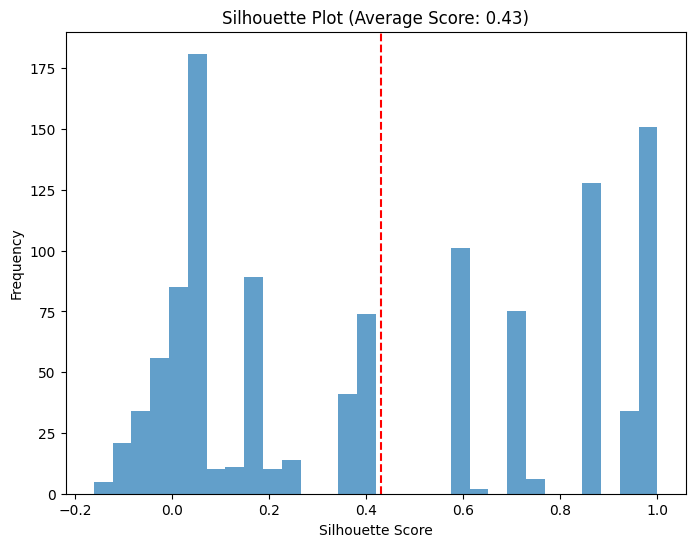

In [ ]:
  import matplotlib.pyplot as plt
  from sklearn.metrics import silhouette_samples, silhouette_score

  silhouette_values = silhouette_samples(X_tfidf, kmeans.labels_)
  silhouette_avg = silhouette_score(X_tfidf, kmeans.labels_)

  # Plot silhouette plot
  plt.figure(figsize=(8, 6))
  plt.hist(silhouette_values, bins=30, alpha=0.7)
  plt.axvline(x=silhouette_avg, color="red", linestyle="--")
  plt.title(f"Silhouette Plot (Average Score: {silhouette_avg:.2f})")
  plt.xlabel("Silhouette Score")
  plt.ylabel("Frequency")
  plt.show()



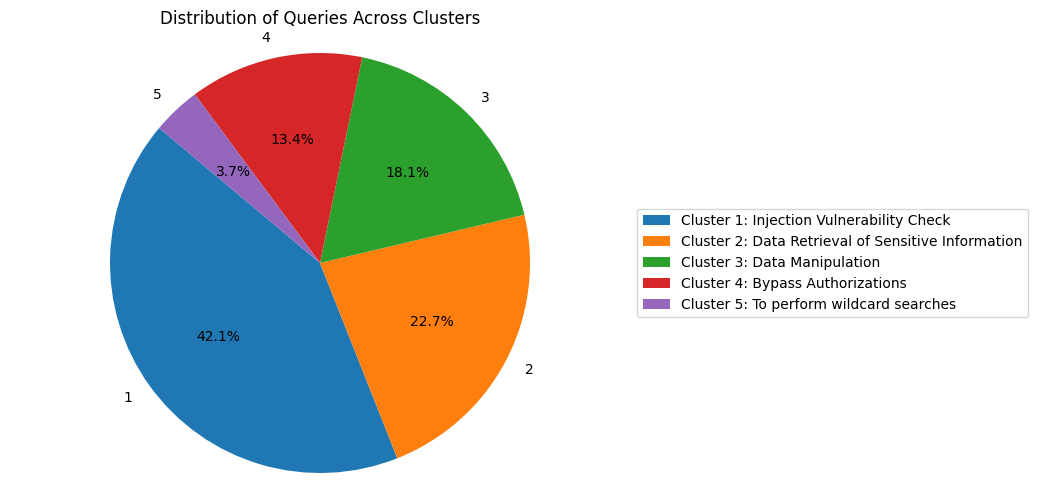

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

cluster_descriptions = {
    '1': 'Injection Vulnerability Check',
    '2': 'Data Retrieval of Sensitive Information',
    '3': 'Data Manipulation',
    '4': 'Bypass Authorizations',
    '5': 'To perform wildcard searches'
}

# Number of queries in each cluster
cluster_counts = data['Cluster'].value_counts()

custom_labels = ['1', '2', '3', '4', '5']

plt.figure(figsize=(8, 6))
plt.pie(cluster_counts, labels=custom_labels, autopct='%1.1f%%', startangle=140)
# Create a legend for the clusters
legend_labels = [f'Cluster {label}: {cluster_descriptions[label]}' for label in custom_labels]
plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Distribution of Queries Across Clusters')
plt.axis('equal')
plt.show()


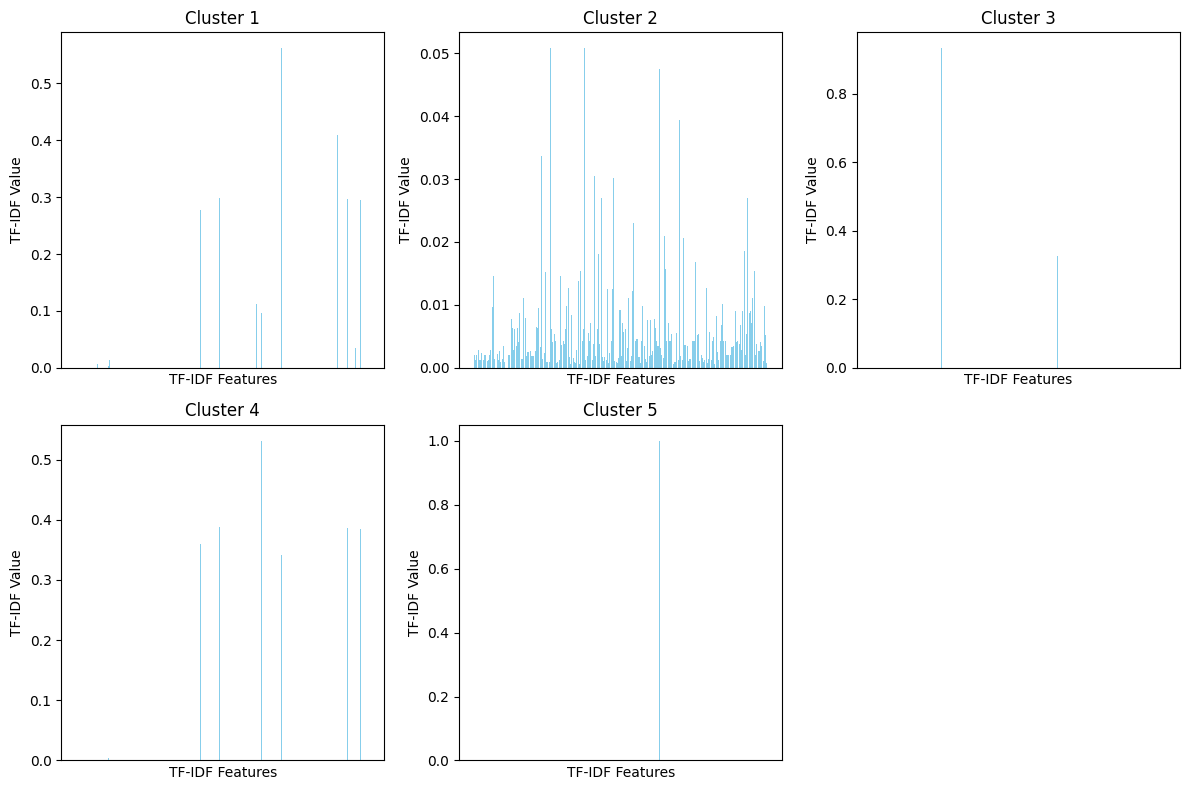

In [ ]:
# Plot cluster centers as bar plots
plt.figure(figsize=(12, 8))
for cluster in range(k):
    plt.subplot(2, 3, cluster + 1)
    plt.bar(range(len(cluster_centers[cluster])), cluster_centers[cluster], color='skyblue')
    plt.title(f'Cluster {cluster + 1}')
    plt.xlabel('TF-IDF Features')
    plt.ylabel('TF-IDF Value')
    plt.xticks([])
plt.tight_layout()
plt.show()

